In [27]:
import numpy as np
from pandas import read_excel, DataFrame, get_dummies, concat
from matplotlib import pyplot as plt
import seaborn as sb
from scipy import stats

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau


### 02. 데이터셋 준비하기

In [28]:
origin = read_excel('../../biostat.xlsx')
origin.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1


In [29]:
len(origin.columns)

19

### 03. 데이터 전처리
#### 결측치 확인


In [30]:
origin.isna().sum()


id                    0
age                   0
sex                   0
weight                0
OP_date               0
Recur                 0
Recur_1y              0
Recur_date            0
SBP                   0
CA19.9                0
CRP                   0
CEA                   0
post.CEA              0
stage                 0
smoking               0
obesity               0
post.CA19.9           0
post.CA19.9.binary    0
post.CA19.9.3grp      0
dtype: int64

### 04 불필요한 데이터 제거

In [31]:
df = origin.drop(['OP_date','Recur_date','id'], axis=1)
df

,age,sex,weight,Recur,Recur_1y,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp
0,82,1,73.994588,1,0,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1
1,50,0,64.819694,0,0,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1
2,28,1,63.204675,0,0,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1
3,35,1,52.499192,1,0,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1
4,49,1,72.766264,1,0,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,54,1,59.109922,0,0,79.698126,34.1,0.8,17.5,25.0,2,0,0,35.861255,0,1
152,62,1,75.948164,0,0,134.097007,6.8,3.0,8.5,1.0,1,0,0,33.238574,0,1
153,51,0,48.533056,1,0,116.632122,6.1,0.1,2.4,1.8,1,0,1,31.965658,0,1
154,51,0,44.724691,0,0,151.178202,1.6,1.2,2.3,0.6,1,0,0,37.996578,1,2


> 수술 날짜와 재발 날짜 제거

#### 더미 변수 생성

In [32]:
df[['Recur_1y','sex', 'Recur','smoking','stage','obesity','post.CA19.9.binary','post.CA19.9.3grp']] = df[['Recur_1y','sex', 'Recur','smoking','stage','obesity','post.CA19.9.binary','post.CA19.9.3grp']].astype('category')
cdf = df[['Recur_1y','sex', 'Recur','smoking','stage','obesity','post.CA19.9.binary','post.CA19.9.3grp']] 
cdf = get_dummies(cdf, columns=['stage', 'post.CA19.9.3grp'], drop_first=True, dtype='int')

cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Recur_1y            156 non-null    category
 1   sex                 156 non-null    category
 2   Recur               156 non-null    category
 3   smoking             156 non-null    category
 4   obesity             156 non-null    category
 5   post.CA19.9.binary  156 non-null    category
 6   stage_2             156 non-null    int32   
 7   stage_3             156 non-null    int32   
 8   post.CA19.9.3grp_2  156 non-null    int32   
 9   post.CA19.9.3grp_3  156 non-null    int32   
dtypes: category(6), int32(4)
memory usage: 4.2 KB


#### 탐색적 데이터 분석

In [33]:
df.describe()

,age,weight,SBP,CA19.9,CRP,CEA,post.CEA,post.CA19.9
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,56.858974,68.125624,115.898871,1158.631410,3.062821,3.930128,5.363462,48.193259
std,12.790343,14.467480,37.701583,6709.440806,3.550361,4.135752,12.846207,22.921452
min,25.000000,40.000000,5.629379,1.000000,0.100000,0.300000,0.100000,30.760115
25%,50.000000,58.257205,89.074804,10.400000,0.100000,1.500000,0.600000,34.908674
50%,58.000000,69.084391,114.647853,23.150000,1.300000,2.400000,1.650000,41.285774
75%,65.000000,80.053547,144.331917,61.725000,4.850000,4.525000,4.800000,51.216016
max,82.000000,95.000000,206.847716,48599.800000,12.300000,20.400000,118.500000,174.433426


In [34]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df

,age,weight,SBP,CA19.9,CRP,CEA,post.CEA,post.CA19.9
0,82,73.994588,144.286869,4490.5,0.1,3.0,5.1,36.795194
1,50,64.819694,108.590964,36.7,0.1,1.1,1.5,32.765043
2,28,63.204675,5.629379,36.7,0.1,10.7,12.4,31.133072
3,35,52.499192,143.931300,64.9,1.3,1.3,0.4,36.134051
4,49,72.766264,172.653143,38.2,10.7,3.7,0.4,33.921657
...,...,...,...,...,...,...,...,...
151,54,59.109922,79.698126,34.1,0.8,17.5,25.0,35.861255
152,62,75.948164,134.097007,6.8,3.0,8.5,1.0,33.238574
153,51,48.533056,116.632122,6.1,0.1,2.4,1.8,31.965658
154,51,44.724691,151.178202,1.6,1.2,2.3,0.6,37.996578


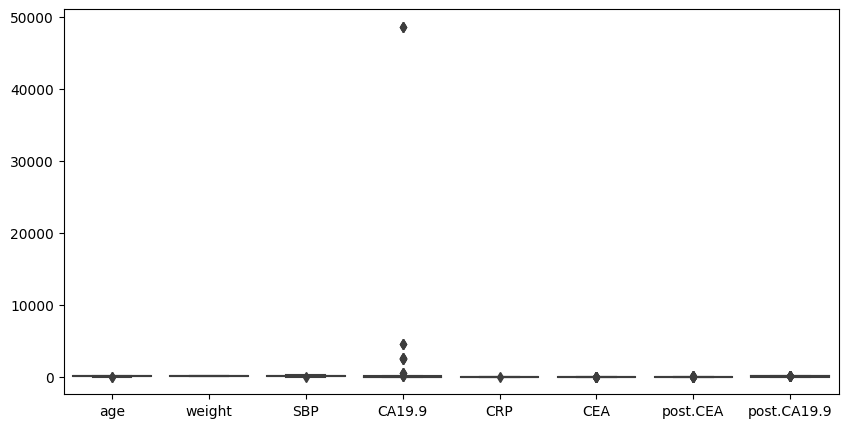

In [35]:
plt. figure(figsize=(10,5))
sb.boxplot(data= numeric_df)
plt.show()
plt.close()

CA19.9 값 중 outlier제거 필요성이 보인다.

In [36]:
z_scores = np.abs(stats.zscore(numeric_df))
filtered_data = numeric_df[z_scores < 2]

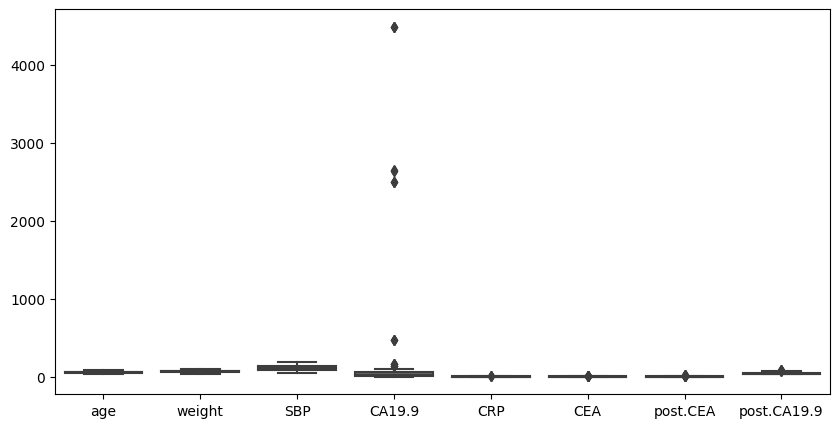

In [37]:
plt. figure(figsize=(10,5))
sb.boxplot(data= filtered_data)
plt.show()
plt.close()

여전히 Outlier가 크기 떄문에 정규화를 실행해준다.

#### 정규화를 실행

In [38]:
numeric_df_scaler = StandardScaler()
numeric_df_scale = numeric_df_scaler.fit_transform(numeric_df)
print(numeric_df_scale.shape)
numeric_df_scale

(156, 8)


array([[ 1.97195606,  0.40697241,  0.7553907 , ..., -0.22562375,
        -0.02057495, -0.49886779],
       [-0.53798903, -0.2292436 , -0.1944598 , ..., -0.68651197,
        -0.30171584, -0.67525848],
       [-2.26357628, -0.34123411, -2.93421703, ...,  1.64218639,
         0.54951631, -0.7466862 ],
       ...,
       [-0.45955325, -1.35861035,  0.01951145, ..., -0.3711674 ,
        -0.27828744, -0.71024579],
       [-0.45955325, -1.62269436,  0.93876567, ..., -0.39542467,
        -0.37200107, -0.44628592],
       [ 0.08949724,  0.38578901, -0.09519986, ..., -0.3711674 ,
        -0.34076319, -0.50634347]])

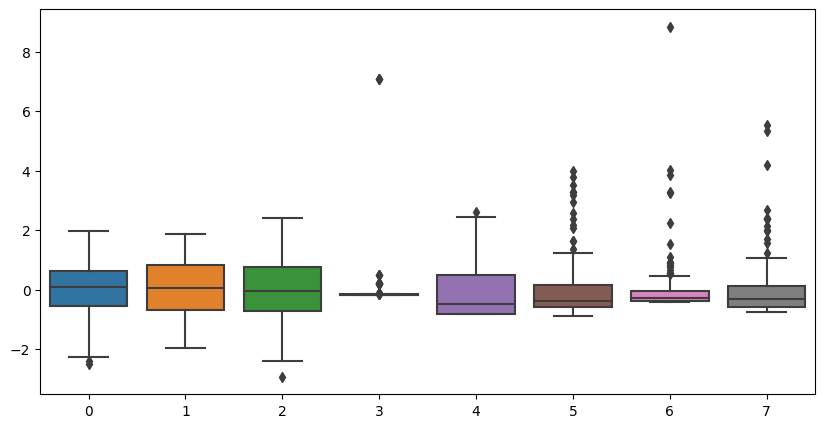

In [39]:
plt. figure(figsize=(10,5))
sb.boxplot(data= numeric_df_scale)
plt.show()
plt.close()

### 05. 데이터셋 분할하기
#### 랜덤시드 고정

In [40]:
np.random.seed(100)

In [41]:
num_df = DataFrame(numeric_df_scale,columns =numeric_df.columns)

In [42]:
df2 = concat([cdf, num_df],axis=1)
df2 = df2.dropna()
x = df2.drop('Recur_1y',axis=1)
x.head()


,sex,Recur,smoking,obesity,post.CA19.9.binary,stage_2,stage_3,post.CA19.9.3grp_2,post.CA19.9.3grp_3,age,weight,SBP,CA19.9,CRP,CEA,post.CEA,post.CA19.9
0,1,1,1,1,0,0,1,0,0,1.971956,0.406972,0.755391,0.498193,-0.837200,-0.225624,-0.020575,-0.498868
1,0,0,1,0,0,0,1,0,0,-0.537989,-0.229244,-0.194460,-0.167755,-0.837200,-0.686512,-0.301716,-0.675258
2,1,0,1,0,0,0,1,0,0,-2.263576,-0.341234,-2.934217,-0.167755,-0.837200,1.642186,0.549516,-0.746686
3,1,1,1,1,0,0,1,0,0,-1.714526,-1.083586,0.745929,-0.163539,-0.498118,-0.637997,-0.387620,-0.527805
4,1,1,1,0,0,0,1,0,0,-0.616425,0.321797,1.510203,-0.167531,2.158028,-0.055823,-0.387620,-0.624636


In [43]:
y = df2[['Recur_1y']]
y.head()

,Recur_1y
0,0
1,0
2,0
3,0
4,0


#### 훈련 데이터와 검증 데이터로 분할

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((109, 17), (47, 17), (109, 1), (47, 1))

### 06. 모델 개발
#### 모델 정의

In [45]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(17, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1152      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=10, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=8, factor = 0.5, min_lr=0.0001, verbose=1)
])


Epoch 1/500


4/4 [==============================] - 1s 110ms/step - loss: 0.6789 - acc: 0.5688 - val_loss: 0.7206 - val_acc: 0.4894 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 20ms/step - loss: 0.6348 - acc: 0.6697 - val_loss: 0.7018 - val_acc: 0.5319 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 20ms/step - loss: 0.6111 - acc: 0.7339 - val_loss: 0.6904 - val_acc: 0.5957 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 18ms/step - loss: 0.5933 - acc: 0.7248 - val_loss: 0.6809 - val_acc: 0.5957 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5745 - acc: 0.7615 - val_loss: 0.6685 - val_acc: 0.6170 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 20ms/step - loss: 0.5603 - acc: 0.7615 - val_loss: 0.6576 - val_acc: 0.6383 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 0s 21ms/step - loss: 0.5436 - acc: 0.8073 - val_loss: 0.6488 - val_acc: 0.6383 - lr: 0.0010
Epoch 8/50

### 07. 학습 결과 평가

In [47]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace= True)    
train_column_name = [result_df.columns[0], result_df.columns[1]]
test_column_name = [result_df.columns[2], result_df.columns[3]]


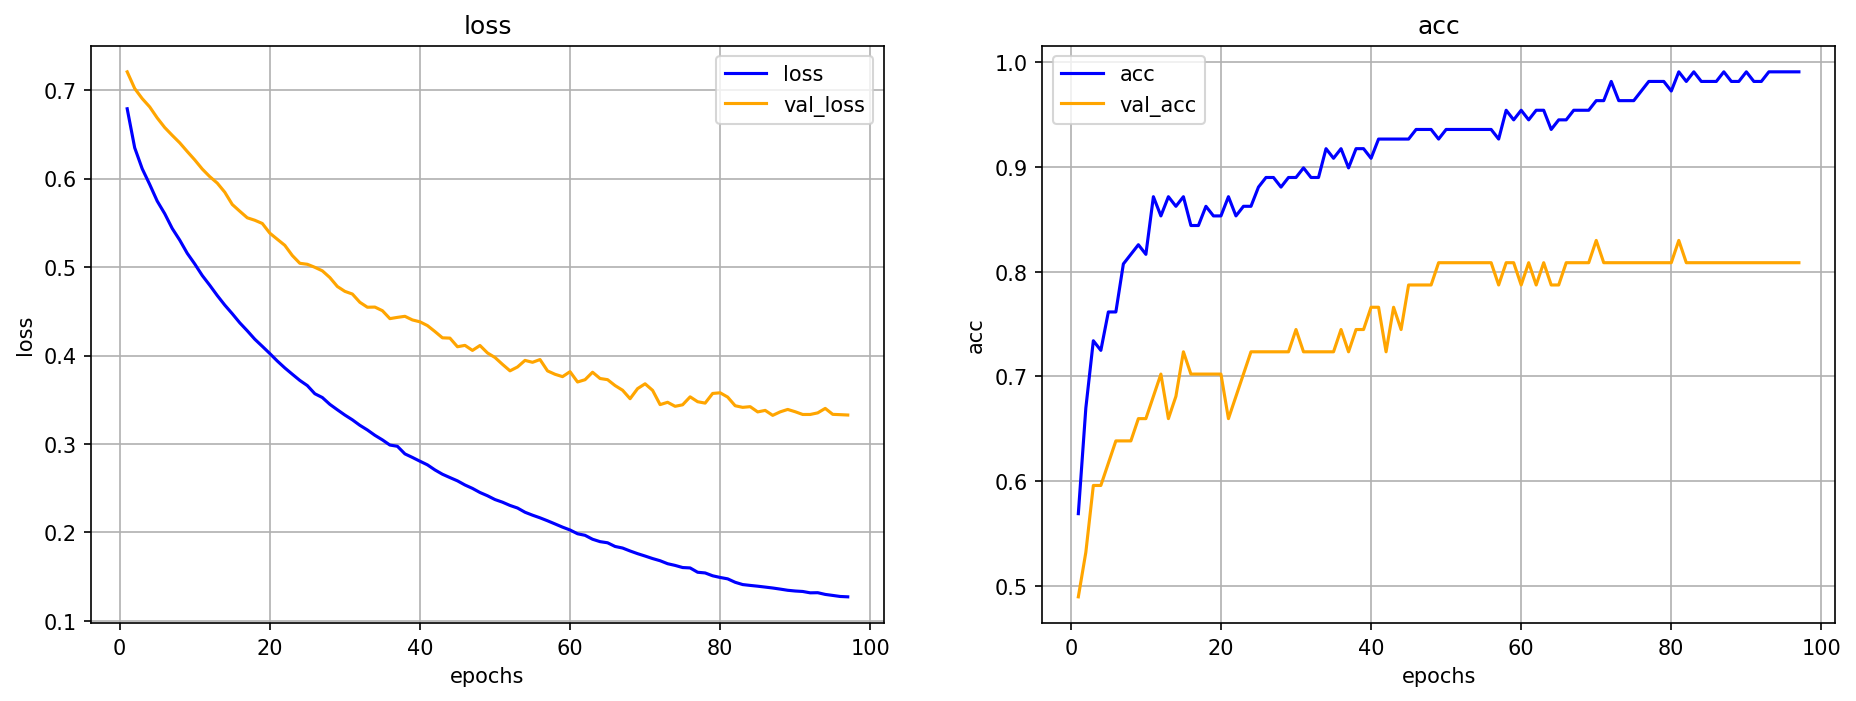

4/4 [==============================] - 0s 3ms/step - loss: 0.1264 - acc: 0.9908
최종 훈련 손실률: 0.126374, 최종 훈련 정확도: 0.990826
2/2 [==============================] - 0s 6ms/step - loss: 0.3327 - acc: 0.8085
최종 검증 손실률: 0.332747, 최종 검증 정확도: 0.808511


In [48]:
fig, ax = plt.subplots(1,2, figsize =(15,5), dpi = 150)
for i, v in enumerate(ax):
    sb.lineplot(x = result_df.index, y = train_column_name[i], data = result_df,  color = 'blue', label = train_column_name[i], ax =v)
    sb.lineplot(x = result_df.index, y = test_column_name[i], data = result_df, color = 'orange', label = test_column_name[i], ax =v)
    v.set_title(train_column_name[i])
    v.set_xlabel('epochs')
    v.set_ylabel(train_column_name[i])
    v.grid()
    v.legend()
plt.show()
plt.close()
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))


In [49]:
y_train.value_counts()

Recur_1y
0           74
1           35
Name: count, dtype: int64

In [50]:
y_test.value_counts()

Recur_1y
0           28
1           19
Name: count, dtype: int64

### 08. 로지스틱 회귀 결과 검정

In [51]:
pred_bool = model.predict(x_test).flatten()
threshold = 0.4
pred = (pred_bool >= threshold).astype(int)
cm = confusion_matrix(y_test, pred)
tn, fp, fn, tp = cm.ravel()
cmdf = DataFrame([ [ tp , fn ], [fp, tn]], index =[["Predicted Values","Predicted Values"],['Positive', "Negative"]], columns = [["Actual Values","Actual Values"],["Positive", "Negative"]])
cmdf

2/2 [==============================] - 0s 6ms/step


Actual Values         
                               Positive Negative
Predicted Values Positive            13        6
                 Negative             2       26

In [52]:
# RAS
ras = roc_auc_score(y_test, pred)

# 위양성율, 재현율, 임계값(사용안함)
fpr, tpr, thresholds = roc_curve(y_test, pred)

# 정확도
acc = accuracy_score(y_test, pred)

# 정밀도
pre = precision_score(y_test, pred)

# 재현율
recall = recall_score(y_test, pred)

# F1 score
f1 = f1_score(y_test, pred)

# 위양성율
fallout = fp / (fp + tn)

# 특이성
spe = 1 - fallout

result_df = DataFrame({'정확도(Accuracy)':[acc], '정밀도(Precision)':[pre], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe], 'RAS': [ras], 'f1_score':[f1]})  
result_df

,정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.829787,0.866667,0.684211,0.071429,0.928571,0.806391,0.764706
